## Q1. Linear, Ridge, and Lasso Regression

In [2]:
# Imported the packages: csv, Pandas, Scikit-learn, Numpy, Networkx, collections.
import csv
import pandas as pd
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import re
import sklearn
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn import cluster
import networkx as nx
from collections import defaultdict

# Imported the train data.
with open("/Users/advaitiyer/Desktop/Syracuse University/Academics/3rd Semester/Analytical Data Mining CIS 787/Homeworks/HW4/blogData_train.csv") as csvfile:
    file1=csv.reader(csvfile,delimiter=',')
    train_list=[]
    for row in file1:
        train_list.append(row)
# Split the train data into x_train (predictors) and y_train (target).
x_train1=pd.DataFrame(train_list)
x_train=x_train1.loc[:,:279]

y_train=x_train1[280]

In [2]:
# Imported the test data.
with open("/Users/advaitiyer/Desktop/Syracuse University/Academics/3rd Semester/Analytical Data Mining CIS 787/Homeworks/HW4/blogData_test-2012.03.31.01_00.csv") as csvfile1:
    file2=csv.reader(csvfile1,delimiter=',')
    test_list=[]
    for row in file2:
        test_list.append(row)
# Split the test data into x_test (predictors), and y_test (target).
x_test1=pd.DataFrame(test_list)
x_test=x_test1.loc[:,:279]

y_test=x_test1[280]

#### Model 1: Linear Regression

In [3]:
# Fit the model.
lr=linear_model.LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
# Calculate errors in train and test sets.
new_train_error = np.sqrt(mean_squared_error(y_train, lr.predict(x_train)))
new_test_error = np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))
# Print the errors as report.
print('train RMSE: {} test RMSE: {}'.format(round(new_train_error,3),round(new_test_error,3)))


train error: 30.053 test error: 40.399


#### Model 2: Ridge Regression

In [66]:
# Set alpha as a series of multiples of 0.2.
alphas = [i*0.2 for i in range(0,100)]
for alpha in alphas:
    # Instantiate the ridge regression model and fit the data.
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=46)
    ridge.fit(x_train, y_train)
    # Calculate the train and test errors.
    new_train_error = np.sqrt(mean_squared_error(y_train, ridge.predict(x_train)))
    new_test_error = np.sqrt(mean_squared_error(y_test, ridge.predict(x_test)))
    # Print errors as report.
    print('alpha: {} | train RMSE: {} test RMSE: {}'.format(alpha,round(new_train_error,6),round(new_test_error,6)))

alpha: 0.0 | train error: 30.052684 test error: 40.39306
alpha: 0.2 | train error: 30.054198 test error: 40.394887
alpha: 0.4 | train error: 30.054237 test error: 40.396618
alpha: 0.6000000000000001 | train error: 30.054291 test error: 40.398181
alpha: 0.8 | train error: 30.054356 test error: 40.399609
alpha: 1.0 | train error: 30.054429 test error: 40.400926
alpha: 1.2000000000000002 | train error: 30.054507 test error: 40.402151
alpha: 1.4000000000000001 | train error: 30.054589 test error: 40.403296
alpha: 1.6 | train error: 30.054674 test error: 40.404375
alpha: 1.8 | train error: 30.054761 test error: 40.405395
alpha: 2.0 | train error: 30.05485 test error: 40.406363
alpha: 2.2 | train error: 30.054941 test error: 40.407286
alpha: 2.4000000000000004 | train error: 30.055032 test error: 40.408169
alpha: 2.6 | train error: 30.055124 test error: 40.409015
alpha: 2.8000000000000003 | train error: 30.055216 test error: 40.409829
alpha: 3.0 | train error: 30.055308 test error: 40.410613

#### Model 3: Lasso Regression

In [ ]:
# Set alpha as a series of multiples of 0.2.
alphas = [i*0.2 for i in range(0,100)]
for alpha in alphas:
    # Instantiate the lasso regression model and fit the data.
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=46)
    lasso.fit(x_train, y_train)
    # Calculate the train and test errors.
    new_train_error = np.sqrt(mean_squared_error(y_train, lasso.predict(x_train)))
    new_test_error = np.sqrt(mean_squared_error(y_test, lasso.predict(x_test)))
    # Print errors as report.
    print('alpha: {} | train RMSE: {} test RMSE: {}'.format(alpha,round(new_train_error,6),round(new_test_error,6)))

In [57]:
coeff=lasso.coef_

array([ 0.07146315,  0.06007947, -0.        ,  0.01599065,  0.13351931,
        0.        ,  0.        , -0.        ,  0.        ,  0.03991606,
        0.        ,  0.        ,  0.        ,  0.01193697,  0.        ,
        0.        ,  0.        , -0.        , -0.03770052,  0.        ,
        0.        ,  0.        ,  0.00148093,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.01838712,  0.16376379, -0.        , -0.04129069,  0.04999613,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.11376435,  0.00016691,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.  

#### Top features in Lasso Regression

In [65]:
lasso_features=list(zip(x_train.columns,coeff))
lasso_features

def Sort(x):
    return(sorted(x, key=lambda x: float(x[1]), reverse=True))
lasso_important=Sort(lasso_features)

print("Most important features:")
lasso_important[0:10]

Most important features:


[(51, 0.16376378778312045),
 (4, 0.13351930903691636),
 (0, 0.07146314980038826),
 (1, 0.060079469033783355),
 (54, 0.049996134789007544),
 (9, 0.039916055366845796),
 (3, 0.015990649934812477),
 (13, 0.011936969349406416),
 (22, 0.0014809309542255734),
 (61, 0.00016690650053778437)]

## Q2 Spectral Clustering

#### Method 1. Using Networkx and Scikit-learn

In [3]:
# Clustering with Networkx

# Read the data. Data is in graph format.
G=nx.read_gml("/Users/advaitiyer/Desktop/Syracuse University/Academics/3rd Semester/Analytical Data Mining CIS 787/Homeworks/HW4/karate.gml.txt",label='id')

# for line in nx.generate_adjlist(G):
#     print(line)

# Create adjacency matrix from the graph data.
A=nx.adjacency_matrix(G)
# print(A.todense())

# Conduct Spectral clustering with Scikit-learn's Spectral Clustering method.
spectral_clustering=cluster.SpectralClustering(n_clusters=2,affinity="precomputed", n_init=200)
spectral_clustering.fit(A)
results=[]
results.append(list(spectral_clustering.labels_))
results

[[0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]]

#### Method 2. Using Linear algebra, and k-means

In [4]:
# Create degree matrix from the adjacency matrix.
D=np.diag(np.sum(np.array(A.todense()),axis=1))
print("degree matrix:")
print(D)

# Create Laplacian matrix.
L=D-A
print("Laplacian matrix:")
print(L)

degree matrix:
[[16  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 17]]
Laplacian matrix:
[[16 -1 -1 ... -1  0  0]
 [-1  9 -1 ...  0  0  0]
 [-1 -1 10 ...  0 -1  0]
 ...
 [-1  0  0 ...  6 -1 -1]
 [ 0  0 -1 ... -1 12 -1]
 [ 0  0  0 ... -1 -1 17]]


Eigenvalues:
[1.81366960e+01 1.70551712e+01 1.33061223e+01 1.09210675e+01
 9.77724095e+00 6.99619703e+00 6.51554463e+00 6.33159222e+00
 5.61803399e+00 5.37859508e+00 4.58079267e+00 4.48000767e+00
 4.27587682e+00 3.47218740e+00 3.38196601e+00 3.37615409e+00
 3.24206748e+00 3.01396297e+00 2.74915718e+00 2.48709173e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 1.95505045e+00 1.82605521e+00 1.76189862e+00
 1.59928308e+00 1.25940411e+00 1.12501072e+00 9.09247664e-01
 4.68525227e-01 6.84538602e-15]
Eigenvectors:
[[ 0.19374903 -0.94093217 -0.09478253 ... -0.06940423 -0.11213743
  -0.17149859]
 [ 0.00522422  0.06586476  0.09918451 ... -0.09514749 -0.04128789
  -0.17149859]
 [ 0.02918609  0.11506912 -0.31479791 ... -0.04270411  0.02321896
  -0.17149859]
 ...
 [-0.0855124   0.07685092 -0.12302713 ...  0.02830225  0.09875343
  -0.17149859]
 [-0.05907528 -0.07434337  0.88955887 ...  0.03779294  0.13034546
  -0.17149859]
 [ 0.94347941  0.20184142  0.0374803  ...  

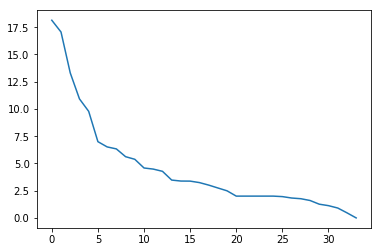

In [8]:
eigenvalues,eigenvectors=np.linalg.eig(L)

# Compute eigenvalues. Sort them in descending order.
print("Eigenvalues:")
ids=eigenvalues.argsort()[::-1]
eigenvalues=eigenvalues[ids]
print(eigenvalues)
plt.plot(eigenvalues)


# Compute eigenvectors. Sort them through the ids of eigenvalue array.
print("Eigenvectors:")
eigenvectors=eigenvectors[:,ids]
print(eigenvectors)

In [9]:
# K-means:

# Run k-means clustering algorithm using 2 clusters.
kmeans_clustering=cluster.KMeans(n_clusters=2)
kmeans_clustering.fit(np.transpose(eigenvectors))
clusters=kmeans_clustering.labels_
# Print the clusters.
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int32)